In [1]:
#https://github.com/kmsravindra/ML-AI-experiments/blob/master/AI/LSTM-time_series/LSTM%20-%20Sine%20wave%20predictor.ipynb
#https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
series = pd.read_excel('/content/temp only.xlsx', header=None )

In [3]:
series.head()

,0
0,271.344059
1,273.913663
2,277.316851
3,283.796798
4,290.649088


In [4]:
series.shape

(204, 1)

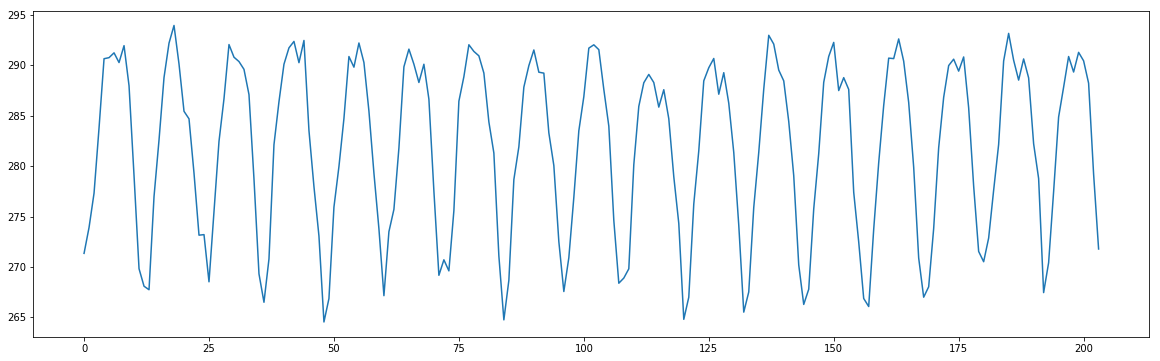

In [5]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

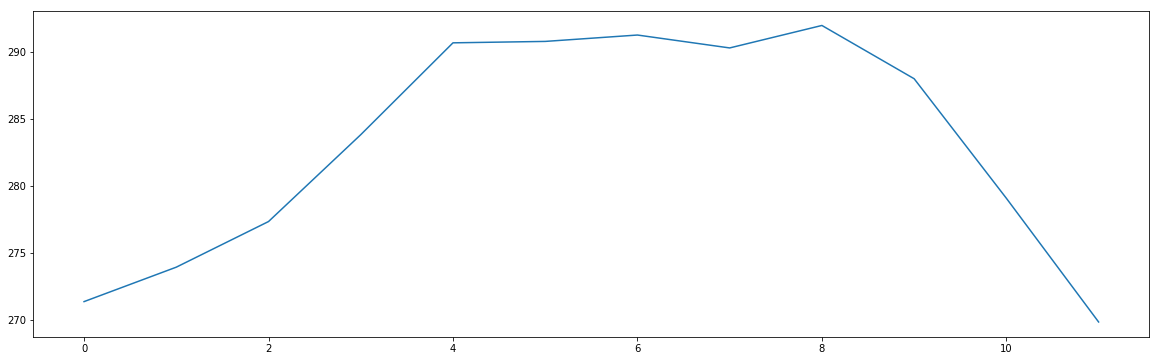

In [6]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:12])
pyplot.show()

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [0]:
window_size = 12

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [9]:

series.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-0.537277,-0.362509,-0.131045,0.309681,0.775731,0.782923,0.815312,0.749845,0.863853,0.593630,-0.012929,-0.640609,-0.758799
1,-0.362509,-0.131045,0.309681,0.775731,0.782923,0.815312,0.749845,0.863853,0.593630,-0.012929,-0.640609,-0.758799,-0.782559
2,-0.131045,0.309681,0.775731,0.782923,0.815312,0.749845,0.863853,0.593630,-0.012929,-0.640609,-0.758799,-0.782559,-0.154159
3,0.309681,0.775731,0.782923,0.815312,0.749845,0.863853,0.593630,-0.012929,-0.640609,-0.758799,-0.782559,-0.154159,0.227303
4,0.775731,0.782923,0.815312,0.749845,0.863853,0.593630,-0.012929,-0.640609,-0.758799,-0.782559,-0.154159,0.227303,0.648805


In [10]:
series.shape

(192, 13)

In [0]:

nrow = round(0.75*series.shape[0])

In [12]:
nrow

144

In [0]:

train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [14]:
test.shape

(48, 13)

In [0]:
from sklearn.utils import shuffle
train = shuffle(train)

In [16]:
train.shape

(144, 13)

In [0]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [0]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [19]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [0]:

train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [21]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [22]:
model = Sequential()
model.add(LSTM(input_shape = (12,1), output_dim= 12, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(40))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(12, 1), return_sequences=True, units=12)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 12)            672       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                8480      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9,193
Trainab

In [23]:
start = time.time()
model.fit(train_X,train_y,batch_size=32,nb_epoch=100,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 3s 26ms/step - loss: 0.3748 - val_loss: 0.2303
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3646 - val_loss: 0.2216
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3521 - val_loss: 0.2139
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3398 - val_loss: 0.2047
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3211 - val_loss: 0.1956
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2971 - val_loss: 0.1876
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2859 - val_loss: 0.1833
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2739 - val_loss: 0.1689
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2482 - val_loss: 0.1486
Epoch 10/100
129/129 [=======================

In [0]:
preds = model.predict(test_X)

In [0]:
preds = scaler.inverse_transform(preds)

In [26]:
preds.shape

(48, 1)

In [0]:
teest=np.asmatrix(test_y)
teest
actuals = scaler.inverse_transform(teest)

In [0]:
#mean_squared_error(actuals,preds)

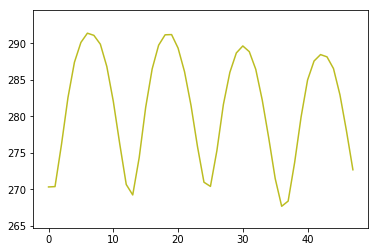

In [29]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

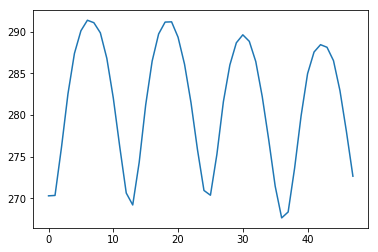

In [30]:
pyplot.plot(preds)
pyplot.show()

In [0]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
      
    preds_moving=np.asmatrix(preds_moving)
    
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving

In [32]:

preds_moving = moving_test_window_preds(98)
preds_moving

array([[270.31784, 270.30682, 275.83478, 281.97235, 286.63736, 289.1632 ,
        290.15213, 289.53833, 288.00214, 284.7342 , 280.12183, 275.16992,
        271.36697, 271.26187, 275.70285, 281.25986, 285.50378, 288.13525,
        289.32303, 289.08868, 287.47937, 284.5479 , 280.58322, 276.1595 ,
        272.6154 , 272.16632, 275.7306 , 280.7401 , 284.8111 , 287.4592 ,
        288.71924, 288.60745, 287.15442, 284.47916, 280.83817, 276.7734 ,
        273.48477, 272.87042, 275.84036, 280.41318, 284.33475, 286.9611 ,
        288.25488, 288.2258 , 286.90594, 284.41565, 281.00726, 277.20676,
        274.11575, 273.4174 , 275.98166, 280.20718, 283.98743, 286.57877,
        287.88962, 287.92007, 286.70163, 284.35236, 281.12335, 277.52716,
        274.59375, 273.8531 , 276.1299 , 280.07684, 283.72702, 286.27826,
        287.5957 , 287.66898, 286.5282 , 284.28976, 281.2034 , 277.77063,
        274.96722, 274.20828, 276.27475, 279.9961 , 283.5287 , 286.03802,
        287.3547 , 287.4585 , 286.378 

In [33]:
actuals

array([[266.870273 , 266.0730553, 273.7268149, 280.3270896, 286.0054608,
        290.7062784, 290.6596576, 292.6108219, 290.4043689, 286.3156472,
        279.8930775, 270.8905727, 266.9996428, 268.0283698, 273.8053774,
        281.8150997, 286.815219 , 289.9681222, 290.6040599, 289.4186347,
        290.8234305, 285.7855985, 278.0225173, 271.5356568, 270.5158041,
        272.8635341, 277.6023408, 282.1468363, 290.4209763, 293.161152 ,
        290.4967003, 288.5294417, 290.6257961, 288.7477102, 282.2154463,
        278.7696993, 267.4536317, 270.4174723, 277.4707927, 284.8658729,
        287.8263198, 290.8667194, 289.3304675, 291.2796254, 290.440603 ,
        288.2229625, 279.2137169, 271.7781219]])

In [0]:
predicted=[269.32144, 269.92444, 275.8384 , 282.36893, 287.49695, 290.2863 ,
        291.1931 , 290.13794, 287.87003, 283.75256, 278.44693, 273.07693,
        269.6407 , 270.7994 , 276.4621 , 282.7778 , 287.4606 , 290.1567 ,
        290.9583 , 289.89908, 287.15845, 283.00232, 277.93582, 272.9099 ,
        269.973  , 271.57416, 277.21304, 283.25693, 287.65268, 290.1324 ,
        290.72852, 289.48846, 286.60165, 282.40555, 277.4016 , 272.6327 ,
        270.2028 , 272.2923 , 277.9786 , 283.77234, 287.8977 , 290.1385 ,
        290.5161 , 289.0915 , 286.0744 , 281.8168 , 276.8565 , 272.3359 ,
        270.4137 , 272.99414, 278.73737, 284.2949 , 288.15814, 290.15897,
        290.316  , 288.70392, 285.551  , 281.22318, 276.3045 , 272.0427 ,
        270.64017, 273.69907, 279.48477, 284.81256, 288.4204 , 290.18253,
        290.11768, 288.31573, 285.02325, 280.62253, 275.75116, 271.76782,
        270.9005 , 274.4159 , 280.21902, 285.31882, 288.67615, 290.2005 ,
        289.91293, 287.92026, 284.4871 , 280.01468, 275.2021 , 271.52313,
        271.20627, 275.14786, 280.93826, 285.8091 , 288.91928, 290.2064 ,
        289.69592, 287.51303, 283.94016, 279.40054, 274.6631 , 271.31873,
        271.56458, 275.8946]
actual=[266.870273 , 266.0730553, 273.7268149, 280.3270896, 286.0054608,
        290.7062784, 290.6596576, 292.6108219, 290.4043689, 286.3156472,
        279.8930775, 270.8905727, 266.9996428, 268.0283698, 273.8053774,
        281.8150997, 286.815219 , 289.9681222, 290.6040599, 289.4186347,
        290.8234305, 285.7855985, 278.0225173, 271.5356568, 270.5158041,
        272.8635341, 277.6023408, 282.1468363, 290.4209763, 293.161152 ,
        290.4967003, 288.5294417, 290.6257961, 288.7477102, 282.2154463,
        278.7696993, 267.4536317, 270.4174723, 277.4707927, 284.8658729,
        287.8263198, 290.8667194, 289.3304675, 291.2796254, 290.440603 ,
        288.2229625, 279.2137169, 271.7781219]

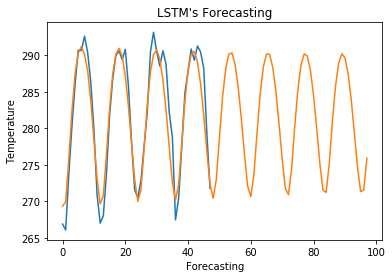

In [35]:
pyplot.plot(actual)
pyplot.plot(predicted)
pyplot.title("LSTM's Forecasting")
pyplot.xlabel('Forecasting')
pyplot.ylabel('Temperature')
pyplot.show()